### Desafío - Dimensionalidad y Agrupación (II)

<br>
<br>

Nombre: Moises Quiroz Diaz

Profesor: Gabriel Tamayo

Generación: Generacion 3


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip



### Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre album_covers

* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
* sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
* skimage.io : Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import MiniBatchKMeans

In [2]:
from sklearn.cluster import KMeans

In [3]:
from skimage import io

### Desafío 2: Importación de imagenes
* Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?

* Para visualizar la imágen en el notebook, ocupe io.imshow .

In [45]:
img = io.imread('album_covers/dua-lipa-self-titled.jpeg')
img

Array([[[122, 139, 182],
        [122, 139, 182],
        [123, 140, 183],
        ...,
        [229, 211, 233],
        [229, 211, 233],
        [229, 211, 233]],

       [[122, 139, 182],
        [123, 140, 183],
        [123, 140, 183],
        ...,
        [229, 211, 233],
        [229, 211, 233],
        [229, 211, 233]],

       [[123, 140, 183],
        [123, 140, 183],
        [124, 141, 184],
        ...,
        [229, 211, 233],
        [229, 211, 233],
        [229, 211, 233]],

       ...,

       [[ 66, 121, 175],
        [ 67, 122, 176],
        [ 67, 122, 176],
        ...,
        [186, 205, 247],
        [179, 198, 240],
        [181, 200, 242]],

       [[ 66, 121, 175],
        [ 67, 122, 176],
        [ 67, 122, 176],
        ...,
        [198, 217, 255],
        [160, 179, 219],
        [165, 185, 222]],

       [[ 66, 121, 175],
        [ 67, 122, 176],
        [ 67, 122, 176],
        ...,
        [212, 230, 255],
        [173, 191, 229],
        [131, 149, 185]]

In [46]:
img.shape

(600, 600, 3)

* Retorna una array de 3 dimensiones, se observa que es una imagen de 600x600 pixeles y que a su vez posee 3 capas de colores

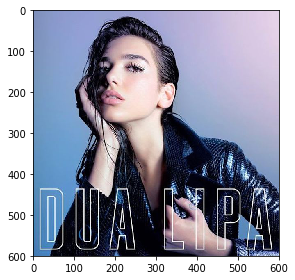

In [47]:
io.imshow(img)
io.show()

### Desafío 3: Preprocesamiento de imágenes y KMeans
* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales (RGB) mediante shape .
* Posteriormente redimensionaremos la imágen con reshape. 
    (Tips: reshape(heigth * width , rgb))
    
* Partamos por inicializar nuestro algoritmo KMeans con un k=8 , ¿Qué significará esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?

In [7]:
altura, ancho, rgb = img.shape
print("Altura:",altura,"\nAncho:",ancho,"\nCantidad de canales RGB:",rgb)

Altura: 640 
Ancho: 640 
Cantidad de canales RGB: 3


In [8]:
img = img.reshape(altura*ancho,img.shape[2])
img.shape

(409600, 3)

In [11]:
Kmeans = KMeans(n_clusters=8, random_state=123)
fit_result = Kmeans.fit_predict(img)

* Significa que que se espera generar 8 grupos al clasificar los pixeles

In [12]:
miniKmeans = KMeans(n_clusters=8, random_state=123)
cluster = MiniBatchKMeans(n_clusters=8, random_state=123)
model = cluster.fit(img)

In [13]:
#Comparacion de etiquetas, Es sabido que MiniBatch es mas rapido, pero que normalmente es menos acertado que K-means normal

Comparacion=pd.DataFrame({'MiniBatch':pd.Series(cluster.labels_).value_counts("%"),'Kmeasn Original':pd.Series(Kmeans.labels_).value_counts("%")})
Comparacion              
                  
              

,MiniBatch,Kmeasn Original
0,0.106116,0.096362
1,0.137615,0.249998
2,0.105381,0.157644
3,0.144800,0.055664
4,0.055667,0.072947
5,0.142485,0.124707
6,0.096575,0.142585
7,0.211362,0.100093


### Desafío 4: Extracción de valores
* Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
* Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .

In [14]:
Comparacion

,MiniBatch,Kmeasn Original
0,0.106116,0.096362
1,0.137615,0.249998
2,0.105381,0.157644
3,0.144800,0.055664
4,0.055667,0.072947
5,0.142485,0.124707
6,0.096575,0.142585
7,0.211362,0.100093


In [15]:
Centroides= Kmeans.cluster_centers_
Centroides

array([[ 52.11309856, 163.65249557,  75.01287053],
       [218.52776883,  15.52175314, 107.07933671],
       [231.64578526, 198.44445649,  26.13746109],
       [253.66973684, 254.33486842, 254.08315789],
       [111.73824425,  34.880083  , 123.69697781],
       [234.48022709,  86.45933829,  29.70260376],
       [ 39.17947708,  63.65681557, 144.11900074],
       [ 31.99712181, 149.74520708, 190.0603688 ]])

In [16]:
np.unique(Centroides,return_counts=True)

(array([ 15.52175314,  26.13746109,  29.70260376,  31.99712181,
         34.880083  ,  39.17947708,  52.11309856,  63.65681557,
         75.01287053,  86.45933829, 107.07933671, 111.73824425,
        123.69697781, 144.11900074, 149.74520708, 163.65249557,
        190.0603688 , 198.44445649, 218.52776883, 231.64578526,
        234.48022709, 253.66973684, 254.08315789, 254.33486842]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]))

### Desafío 5: Conversión rgb a hex

* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [17]:
def rgb_hex_it(rgb):
    tmp=list(map(lambda x: int(x), rgb))
    return "#%02x%02x%02x" % (tmp[0], tmp[1], tmp[2])
hex_convert = list(map(lambda x: rgb_hex_it(x), Centroides))
pd.Series(hex_convert)

0    #34a34b
1    #da0f6b
2    #e7c61a
3    #fdfefe
4    #6f227b
5    #ea561d
6    #273f90
7    #1f95be
dtype: object

### Desafío 6: Definición de base
Ahora generaremos un DataFrame con las siguientes variables:
* El color hex .
* La ocurrencia del color en cada pixel count .
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [18]:
base = pd.DataFrame({'Color Hex':pd.Series(hex_convert),'Porcentaje':pd.Series(Kmeans.labels_).value_counts("%"),'Ocurrencia':pd.Series(Kmeans.labels_).value_counts()})
base

,Color Hex,Porcentaje,Ocurrencia
0,#34a34b,0.096362,39470
1,#da0f6b,0.249998,102399
2,#e7c61a,0.157644,64571
3,#fdfefe,0.055664,22800
4,#6f227b,0.072947,29879
5,#ea561d,0.124707,51080
6,#273f90,0.142585,58403
7,#1f95be,0.100093,40998


In [19]:
base = base.sort_values(by=['Porcentaje'],ascending=False)
base

,Color Hex,Porcentaje,Ocurrencia
1,#da0f6b,0.249998,102399
2,#e7c61a,0.157644,64571
6,#273f90,0.142585,58403
5,#ea561d,0.124707,51080
7,#1f95be,0.100093,40998
0,#34a34b,0.096362,39470
4,#6f227b,0.072947,29879
3,#fdfefe,0.055664,22800


### Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

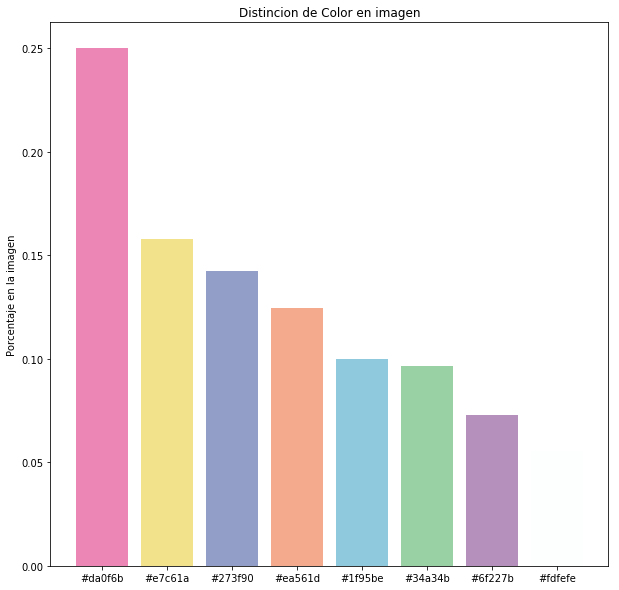

In [20]:
performance = base['Porcentaje']
objects = base['Color Hex']
y_pos= np.arange(len(objects))
plt.figure(figsize=(10,10))
plt.bar(y_pos, performance, align='center', alpha=0.5,color=list(map(mcolors.hex2color,base['Color Hex'])))
plt.xticks(y_pos, objects)
plt.ylabel('Porcentaje en la imagen')
plt.title('Distincion de Color en imagen')
plt.show()


$\hspace{1cm}$

## Extras...

In [22]:
from os import listdir
import cv2

Se muestra una forma alternativa de mostrar los datos, mas que nada para jugar

In [23]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
        color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

In [41]:
def mostrar_colores_carpeta(path,n_imagenes):
    archivos = listdir(path)
    if('.DS_Store' in archivos):
        index = archivos.index('.DS_Store')
        del archivos[index]
    print('los archivos a mostrar son:',archivos[:n_imagenes])
    archivos = archivos[:n_imagenes]
    for imagen in archivos:
        img = io.imread(path+'/'+imagen)
        img2 = img
        altura, ancho, rgb = img.shape
        img = img.reshape(altura*ancho,img.shape[2])
        Kmeans = KMeans(n_clusters=8, random_state=123)
        fit_result = Kmeans.fit_predict(img)
        Centroides= Kmeans.cluster_centers_
        hist = centroid_histogram(Kmeans)
        bar = plot_colors(hist, Centroides)
        fig, axs = plt.subplots(nrows=1, ncols=2)
        ax = axs[0]
        ax.set_title('Imagen original')
        ax.imshow(img2)
        ax = axs[1]
        ax.imshow(bar)
        ax.set_title('Colores dominantes')
        fig.suptitle('Distincion de Color en imagen: '+imagen)
        plt.show()

los archivos a mostrar son: ['dua-lipa-self-titled.jpeg', 'the-clash-london-calling.jpg', 'nails-abandon-all-life.jpg', 'altar-of-plagues-teethed-glory-and-injury.jpg']


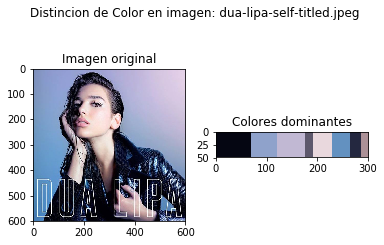

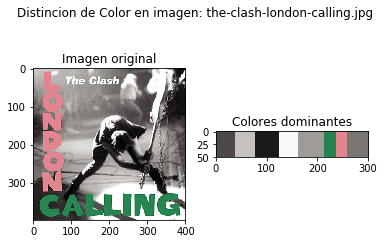

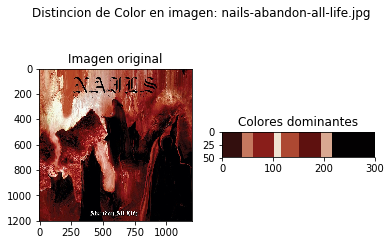

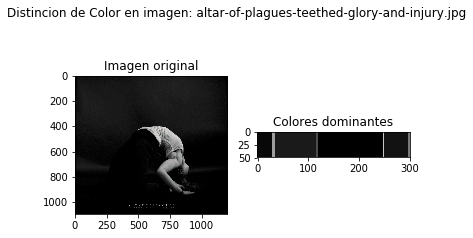

In [44]:
mostrar_colores_carpeta('album_covers',4)